In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
from __future__ import print_function, absolute_import, division

In [8]:
import numpy as np
from wgomoku import (
    GomokuBoard, Move, StochasticMaxSampler, HeuristicGomokuPolicy, 
    ThreatSearch, Heuristics, GomokuTools as gt)

In [9]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

## A sampler
This class allows to sample from the top n of an array of scores, 
with higher probability for the larger scores. With bias > 1.0,
the sampler has an even higher bias toward the larger scores.


In [10]:
sample = np.random.randint(0, 100, [8,8])/20.0
enumerated = list(np.ndenumerate(sample))
sampler = StochasticMaxSampler(enumerated, 10, bias=5)
sampler.choices

[(0.7092166662628514, (0, 2), 0.29078333373714865, 4.95),
 (0.5328476590178203, (7, 6), 0.17636900724503118, 4.85),
 (0.39549133806586356, (2, 6), 0.13735632095195668, 4.8),
 (0.28851812774867236, (2, 5), 0.10697321031719118, 4.75),
 (0.22363559592340798, (5, 3), 0.06488253182526436, 4.65),
 (0.1587530640981436, (5, 2), 0.06488253182526436, 4.65),
 (0.09387053227287923, (0, 5), 0.06488253182526436, 4.65),
 (0.0545172874410758, (7, 7), 0.03935324483180342, 4.55),
 (0.023868949549666552, (7, 0), 0.030648337891409246, 4.5),
 (0.0, (6, 6), 0.023868949549666552, 4.45)]

In [11]:
print([sampler.draw() for i in range(10)])

[(0, 2), (7, 7), (0, 5), (0, 2), (0, 2), (0, 2), (0, 2), (5, 3), (5, 3), (0, 2)]


## Use a policy to play a bit

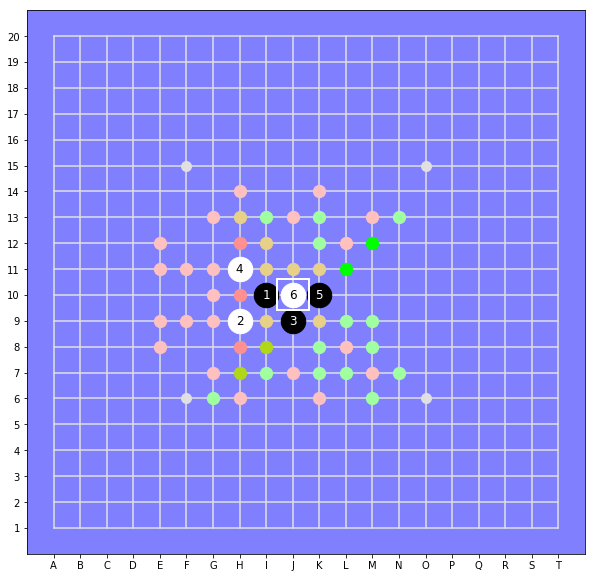

In [12]:
h = Heuristics(kappa=3.0)
board = GomokuBoard(h, N=20, disp_width=10)
p = HeuristicGomokuPolicy(style = 2, bias=.5, topn=5, threat_search=ThreatSearch(5,3))
board.set(I,10).set(H,9).set(J,9).set(H,11).set(K,10).set(J,10)
board.display('current');

CPU times: user 3.51 s, sys: 332 ms, total: 3.84 s
Wall time: 3.84 s
Style: 2: (H, 13)
Value after the move: -36.79268187593628


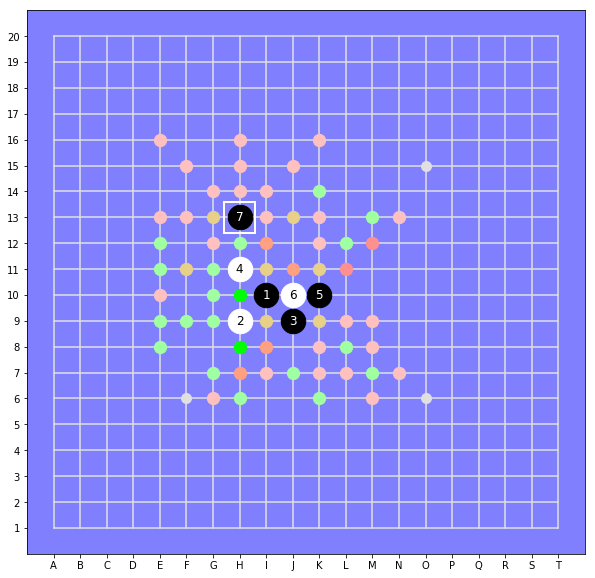

In [13]:
%time move = p.suggest(board)
print(move)
if move.status == 0:
    board.set(move.x, move.y) 
    print("Value after the move: %s" % board.get_value())
else:
    print("GAME OVER!")
board.display('current')

## Self play

In [14]:
def play_game(options, board, black, white):
    verbose=options['verbose']
    winner = 0
    for _ in range(30):
        move = black.suggest(board)
        if verbose >= 2:
            print("Black %s: - %s" % (len(board.stones)+1, str(move)))
        if move.status != 0:
            winner = move.status
            break
        # Some strange things do happen!
        elif move.x == 0:
            winner = 0
            break
        board.set(move.x, move.y)
        move = white.suggest(board)
        if verbose >= 2:
            print("White %s: - %s" % (len(board.stones)+1, str(move)))
        if move.status != 0:
            winner = -move.status
            break
        board.set(move.x, move.y)
    if verbose >= 1:
        print("Black wins." if winner == 1 else "White wins." if winner == -1 else "Not decided yet." )
    return board, gt.stones_to_string(board.stones), winner


game="i10h9j9h11k10j10"
board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))

# Loose (bias=.5), aggressive (style=0), forward-looking (thread_search)
black = HeuristicGomokuPolicy(style = 0, bias=0.5, topn=5, 
                              threat_search=ThreatSearch(5,5))

# Tighter (bias=1.0), defensive (style=2), not as much forward-looking (thread_search)
white = HeuristicGomokuPolicy(style = 2, bias=1.0, topn=5, 
                              threat_search=ThreatSearch(4,4))

board, _, _ = play_game({'verbose': 2}, board, black, white)
board.display('current')

Black 7: - Style: 0: (G, 6)
White 8: - Style: 2: (M, 12)
Black 9: - Style: 0: (K, 9)


KeyboardInterrupt: 

In [15]:
game="i10h9j9h11k10j10"
board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))

# Tight (bias=2.0), aggressive (style=0), forward-looking (thread_search)
black = HeuristicGomokuPolicy(style = 0, bias=0.5, topn=5, 
                              threat_search=ThreatSearch(3,3))

# Very tight (bias=10.0), defensive (style=2), not as much forward-looking (thread_search)
white = HeuristicGomokuPolicy(style = 2, bias=2.0, topn=5, 
                              threat_search=ThreatSearch(3,3))

board, _, _ = play_game({'verbose': 2}, board, black, white)
board.display('current')

Black 7: - Style: 0: (G, 6)
White 8: - Style: 2: (L, 11)
Black 9: - Style: 0: (L, 9)
White 10: - Style: 2: (I, 8)


KeyboardInterrupt: 

In [ ]:
game="i10h9j9h11k10j10"
results=[]
for _ in range(1):
    board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))
    black = HeuristicGomokuPolicy(style = 0, bias=0.5, topn=5, threat_search=ThreatSearch(3,3))
    white = HeuristicGomokuPolicy(style = 2, bias=1.0, topn=5, threat_search=ThreatSearch(2,3))
    board, record, status = play_game({'verbose': 1}, board, black, white)
    results.append([record, status])

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(results)
df.columns=['game', 'winner']
df.to_csv("self_play_games-6.csv", index=None)

In [19]:
df.head()

,game,winner
0,i10h9j9h11k10j10g6m12l9n7m9k9h12p9i12j11i13i11...,1


In [20]:
df1 = pd.read_csv("self_play_games-1.csv")
df2 = pd.read_csv("self_play_games-2.csv")
df3 = pd.read_csv("self_play_games-3.csv")
df4 = pd.read_csv("self_play_games-4.csv")
df5 = pd.read_csv("self_play_games-5.csv")
df6 = pd.read_csv("self_play_games-6.csv")

In [21]:
dfm = df1.append(df2).append(df3).append(df4).append(df5).append(df6)
dfm.count()

game      500
winner    500
dtype: int64

In [22]:
dfm[dfm['winner']==-1].count()

game      127
winner    127
dtype: int64